# Purwadhika Capstone 2

# A. Business Background, Business Problem and Data Analysis Goal
The following is a data analysis project that aims to uncover insights from the NYC TLC Trip Record Dataset provided by Purwadhika.

## Business Background
Creative Mobile Technologies, LLC and VeriFone Inc. are the two companies that provide taxi ride data for this analysis. The former is a company that focuses on integrated technology for the taxi and for-hire vehicle industry, whereas the latter provides technology for electronic payment transactions in many different sectors, such as finance, healthcare, and taxi media and advertising. Both companies serve a wide range of customers worldwide, as CMT Group operates in over 130 cities worldwide, whereas Verifone is a multinational corporation. the NYC TLC Trip Record dataset was primarily collected during the month of January 2023 in New York City, with CMT Group providing most of the data.

## Business Problem
Being two of the large providers integrated technology of the taxi industry, both companies should identify:

1. Revenue Trends: Analyze historical revenue data to identify trends over time, such as patterns in fluctuations and peak periods.
2. Growth Patterns: Determine zones with the highest revenue growth and identify factors driving their growth.
3. Geographical Distribution: Map out the geographical distribution of revenue to pinpoint high and low-performing regions.
4. Revenue Drivers: Understand the key factors influencing revenue, such as ride frequency, trip distance, and duration of rides.
   

By understanding ride patterns and optimizing taxi fleets accordingly, both companies can ensure better vehicle utilization rates, which leads to a more streamlined taxi industry with lower operational cost. Also by optimizing the revenue generated from taxi rides, both CMT Group and Verifone, Inc. have significant opportunities to enhance their market share in the taxi industry and other industries that they have chosen to specialize in.

## Data Analysis Goal
This analysis examines the patterns in trend, growth, and geographical distribution of reveneue generated from taxi rides from the NYC TLC Trip Record Dataset provided by Purwadhika. The dataset contains data concerning ride fares, date and time of pickups and dropoffs, trip distances, and payment methods among other taxi ride information. The analysis is done by examining total fare amount, along with the analysis and visualization of the relationships between it and other relevant variables. For example, by uncovering insights about the relation between fare_amount, trip_distance, or minutes with total_amount, we optimize the variables that have a high correlation with the overall revenue gained from taxi rides. In other words, we aim to uncover insights on how to maximize taxi ride revenue based on its key driving factors.

In [341]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [342]:
df = pd.read_csv("NYC TLC Trip Record.csv")
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_12652\4164042217.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [344]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


# B. Null Values Handling

### Drop all-null column

In [345]:
df.drop('ehail_fee', axis = 1,inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [346]:
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

#### Some columns serve no purpose within the scope of this analysis, whereas the values of other columns can be imputed based on their descriptive statistics. For these reasons we will drop the store_and_fwd_flag column that contain null values and impute other more important columns that contain null values. If we were to otherwise drop the rows, we would lose a significant proportion of the important columns for this analysis.

In [347]:
display(df["store_and_fwd_flag"].value_counts(normalize=True))

N    0.995179
Y    0.004821
Name: store_and_fwd_flag, dtype: float64

In [348]:
df.drop(columns=["store_and_fwd_flag"], axis = 1, inplace = True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [349]:
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

In [350]:
display(df["RatecodeID"].value_counts(), df["passenger_count"].value_counts(),df["payment_type"].value_counts(),df["congestion_surcharge"].value_counts(),df["trip_type"].value_counts())

1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: RatecodeID, dtype: int64

1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: passenger_count, dtype: int64

1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: payment_type, dtype: int64

 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: congestion_surcharge, dtype: int64

1.0    62476
2.0     1401
Name: trip_type, dtype: int64

In [351]:
df[["passenger_count", "congestion_surcharge"]].describe()

,passenger_count,congestion_surcharge
count,63887.000000,63887.000000
mean,1.315870,0.726748
std,0.979054,1.212836
min,0.000000,-2.750000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,2.750000
max,9.000000,2.750000


### passenger_count and congestion_surcharge will be filled with their medians, as the columns are numerical. RateCodeID, payment_type and trip_type, on the other hand, are categorical, as the numbers represent predefined groups from the data dictionary. Therefore, it is more appropriate to impute the values based on the columns' modes instead.

In [352]:
df.fillna({"RatecodeID":1.0, "passenger_count":1.0, "payment_type":1.0, "congestion_surcharge":0.00, "trip_type":1.0}, inplace=True)
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [353]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


# C. Column Data Type Handling

### Now that all null values have been dealt with, manipulating the data types of each column could be done with relative convenience

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   RatecodeID             68211 non-null  float64
 4   PULocationID           68211 non-null  int64  
 5   DOLocationID           68211 non-null  int64  
 6   passenger_count        68211 non-null  float64
 7   trip_distance          68211 non-null  float64
 8   fare_amount            68211 non-null  float64
 9   extra                  68211 non-null  float64
 10  mta_tax                68211 non-null  float64
 11  tip_amount             68211 non-null  float64
 12  tolls_amount           68211 non-null  float64
 13  improvement_surcharge  68211 non-null  float64
 14  total_amount           68211 non-null  float64
 15  pa

In [355]:
# Number of unique values per column
for i in df.columns:
    print(f'{i}: {len(df[i].value_counts())}')

VendorID: 2
lpep_pickup_datetime: 66575
lpep_dropoff_datetime: 66519
RatecodeID: 6
PULocationID: 226
DOLocationID: 249
passenger_count: 10
trip_distance: 1870
fare_amount: 2553
extra: 16
mta_tax: 6
tip_amount: 1492
tolls_amount: 26
improvement_surcharge: 5
total_amount: 4670
payment_type: 5
trip_type: 2
congestion_surcharge: 4


### Columns that contain only a few number of possible values can be treated as categorical variables. Take the example of mta_tax, normally a column describing the price of goods or services can take on an infinite amount of values. But here, there are only 5 recorded values over tens of thousands of rides, this means there are most likely only 5 categories of tax payment amounts that can be charged for a ride.

In [356]:
df['VendorID'] = df['VendorID'].astype(str)
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df["RatecodeID"] = df["RatecodeID"].astype(int).astype(str)
df["PULocationID"] = df['PULocationID'].astype(str)
df["DOLocationID"] = df['DOLocationID'].astype(str)
df["passenger_count"] = df["passenger_count"].astype(int).astype(str)
df['extra'] = df['extra'].astype(str)
df['mta_tax'] = df['mta_tax'].astype(str)
df['tolls_amount'] = df['tolls_amount'].astype(str)
df['improvement_surcharge'] = df['improvement_surcharge'].astype(str)
df['payment_type'] = df['payment_type'].astype(int).astype(str)
df['trip_type'] = df['trip_type'].astype(int).astype(str)
df['congestion_surcharge'] = df['congestion_surcharge'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  object        
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   RatecodeID             68211 non-null  object        
 4   PULocationID           68211 non-null  object        
 5   DOLocationID           68211 non-null  object        
 6   passenger_count        68211 non-null  object        
 7   trip_distance          68211 non-null  float64       
 8   fare_amount            68211 non-null  float64       
 9   extra                  68211 non-null  object        
 10  mta_tax                68211 non-null  object        
 11  tip_amount             68211 non-null  float64       
 12  tolls_amount           68211 non-null  object        
 13  i

In [357]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,1,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1,1,0.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,1,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1,1,0.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,1,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1,1,0.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1,1,0.0


# D. Anomaly Detection & Error Correction

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  object        
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   RatecodeID             68211 non-null  object        
 4   PULocationID           68211 non-null  object        
 5   DOLocationID           68211 non-null  object        
 6   passenger_count        68211 non-null  object        
 7   trip_distance          68211 non-null  float64       
 8   fare_amount            68211 non-null  float64       
 9   extra                  68211 non-null  object        
 10  mta_tax                68211 non-null  object        
 11  tip_amount             68211 non-null  float64       
 12  tolls_amount           68211 non-null  object        
 13  i

In [359]:
df.describe()

,trip_distance,fare_amount,tip_amount,total_amount
count,68211.000000,68211.000000,68211.000000,68211.000000
mean,8.114852,16.603545,2.139012,21.789377
std,585.105955,13.470121,3.052710,15.457115
min,0.000000,-70.000000,-10.500000,-71.500000
25%,1.110000,9.300000,0.000000,12.900000
50%,1.850000,13.500000,1.600000,17.900000
75%,3.210000,19.800000,3.330000,26.150000
max,120098.840000,490.000000,222.220000,491.000000


In [360]:
float_cols = df.select_dtypes(include="float").columns
df[float_cols] = df[float_cols].abs()

In [361]:
df.describe()

,trip_distance,fare_amount,tip_amount,total_amount
count,68211.000000,68211.000000,68211.000000,68211.000000
mean,8.114852,16.638757,2.139456,21.836602
std,585.105955,13.426602,3.052398,15.390326
min,0.000000,0.000000,0.000000,0.000000
25%,1.110000,9.300000,0.000000,12.900000
50%,1.850000,13.500000,1.600000,17.900000
75%,3.210000,19.800000,3.330000,26.180000
max,120098.840000,490.000000,222.220000,491.000000


In [362]:
display(df["lpep_pickup_datetime"].dt.year.value_counts(), df["lpep_dropoff_datetime"].dt.year.value_counts())

2023    68208
2022        2
2009        1
Name: lpep_pickup_datetime, dtype: int64

2023    68208
2022        2
2009        1
Name: lpep_dropoff_datetime, dtype: int64

In [363]:
df[(df["lpep_pickup_datetime"].dt.year == 2009) | (df["lpep_pickup_datetime"].dt.year == 2022)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,1,7,56,1,5.37,16.0,0.0,0.5,0.0,0.0,0.3,16.8,2,1,0.0
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,1,260,164,1,5.48,25.5,0.0,0.5,0.0,6.55,0.3,35.6,2,1,2.75
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,1,65,178,1,7.72,34.5,0.0,0.5,7.2,0.0,1.0,43.2,1,1,0.0


#### It seems reasonable for trips to be recorded during the end of 2022, although it is still unlikely that there were only two trips in the middle of December from the previous year. This is likely test drive data from one month before the data collection system is fully operational. Also, the entry that came from 2009 is most likely a misinput. Adhering to the scope of the analysis, the first two data points from 2022 will be dropped and the last data point will be corrected to January 2023

In [364]:
df.loc[df["lpep_pickup_datetime"].dt.year == 2009, "lpep_pickup_datetime"] = pd.Timestamp("2023-01-01 20:21:27")
df.loc[df["lpep_dropoff_datetime"].dt.year == 2009, "lpep_dropoff_datetime"] = pd.Timestamp("2023-01-02 11:07:31")
df.drop(df[df["lpep_pickup_datetime"].dt.year == 2022].index, inplace=True)
df.reset_index(inplace=True, drop=True)


In [365]:
display(df["lpep_pickup_datetime"].dt.year.value_counts(), df["lpep_dropoff_datetime"].dt.year.value_counts())

2023    68209
Name: lpep_pickup_datetime, dtype: int64

2023    68209
Name: lpep_dropoff_datetime, dtype: int64

In [366]:
display(df["lpep_pickup_datetime"].dt.month.value_counts(), df["lpep_dropoff_datetime"].dt.month.value_counts())

1    68208
2        1
Name: lpep_pickup_datetime, dtype: int64

1    68193
2       16
Name: lpep_dropoff_datetime, dtype: int64

In [367]:
display(df[df["lpep_dropoff_datetime"].dt.month == 2], len(df[df["lpep_dropoff_datetime"].dt.month == 2]))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
25098,2,2023-02-01 03:10:05,2023-02-01 03:40:35,5,82,198,2,4.58,28.00,0.0,0.0,5.66,0.0,0.3,33.96,1,2,0.0
61990,2,2023-01-31 08:46:26,2023-02-01 07:34:55,1,116,161,1,5.66,32.40,0.0,0.5,5.50,0.0,1.0,42.15,1,1,2.75
62118,2,2023-01-31 09:02:52,2023-02-01 09:01:47,1,41,42,1,0.87,7.90,0.0,0.5,0.00,0.0,1.0,9.40,1,1,0.0
62146,2,2023-01-31 09:53:33,2023-02-01 00:00:00,1,7,226,1,1.35,9.30,0.0,0.5,0.00,0.0,1.0,10.80,2,1,0.0
62508,2,2023-01-31 12:41:35,2023-02-01 12:05:19,1,75,42,1,2.17,12.80,0.0,0.5,0.00,0.0,1.0,14.30,2,1,0.0
62589,2,2023-01-31 13:58:22,2023-02-01 11:46:10,1,130,130,1,0.10,3.70,0.0,0.5,0.00,0.0,1.0,5.20,2,1,0.0
62651,2,2023-01-31 13:57:30,2023-02-01 10:49:04,1,244,43,3,5.74,31.00,0.0,0.5,0.00,0.0,0.3,34.55,1,1,2.75
62760,2,2023-01-31 15:21:47,2023-02-01 00:00:00,1,92,64,2,9.15,39.40,0.0,0.5,4.09,0.0,1.0,44.99,1,1,0.0
63103,2,2023-01-31 17:45:46,2023-02-01 17:27:05,1,43,151,1,0.75,5.80,2.5,0.5,2.45,0.0,1.0,12.25,1,1,0.0
63277,2,2023-01-31 18:22:24,2023-02-01 00:00:00,1,82,82,1,1.46,10.70,2.5,0.5,0.00,0.0,1.0,14.70,2,1,0.0


16

### There seems to be only one entry where the pickup date is in February. Although this data seems reasonably valid, it's not within the time scope of this analysis. For this reason, this row will be removed.

In [368]:
df.drop(df[df["lpep_pickup_datetime"].dt.month == 2].index, inplace = True)
df.reset_index(inplace=True, drop=True)

In [369]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 22:29:00,2023-01-31 22:42:00,1,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1,1,0.0
68204,2,2023-01-31 22:40:00,2023-01-31 22:48:00,1,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1,1,0.0
68205,2,2023-01-31 23:46:00,2023-02-01 00:02:00,1,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1,1,0.0
68206,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1,1,0.0


In [370]:
df[df["lpep_pickup_datetime"] > df["lpep_dropoff_datetime"]]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [371]:
df.insert(3, "minutes", df["lpep_dropoff_datetime"]-df["lpep_pickup_datetime"])
df["minutes"] = round(df["minutes"].dt.total_seconds()/60).astype(int)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,minutes,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,11,1,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,7,1,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,6,1,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,6,1,41,238,1,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,6,1,41,74,1,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,2,2023-01-31 22:29:00,2023-01-31 22:42:00,13,1,49,62,1,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1,1,0.0
68204,2,2023-01-31 22:40:00,2023-01-31 22:48:00,8,1,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1,1,0.0
68205,2,2023-01-31 23:46:00,2023-02-01 00:02:00,16,1,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1,1,0.0
68206,2,2023-01-31 23:01:00,2023-01-31 23:19:00,18,1,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1,1,0.0


#### The output of the code below shows that many trips have a trip distance of zero, while also being disengaged only within a few seconds after the meter is initiated. For the purpose of this analysis, these values should be dropped as it would account for invalid rides that may result in distortions when conducting visualizations and analyses later on.

In [372]:
len(df[(df["minutes"] == 0) & (df["trip_distance"] == 0)])

937

In [373]:
df.drop(df[(df["minutes"] == 0) & (df["trip_distance"] == 0)].index, inplace=True)
df.reset_index(inplace=True, drop=True)

In [374]:
df[df["trip_distance"] > 100]["trip_distance"].sort_values(ascending = False, ignore_index=True)

0     120098.84
1      68796.82
2      44003.31
3      43392.12
4      10480.36
5       4707.37
6       4502.86
7       4389.24
8       4070.82
9       3981.90
10      3965.74
11      3940.97
12      3614.44
13      3515.74
14      3508.51
15      3321.43
16      3077.89
17      3008.62
18      2645.65
19      2635.30
20      2606.52
21      2555.47
22      2464.34
23      2446.53
24      2388.79
25      2378.17
26      2367.12
27      2027.31
28      2011.26
29      1802.82
30      1592.66
31      1571.97
32      1543.13
33      1082.45
34       579.63
35       254.65
36       137.95
Name: trip_distance, dtype: float64

### For reference, one the most southernmost parts of Staten Island is 50 miles away from one the most northernmost parts of the Bronx, and the distance between EWR aiport to one of the eastermost parts of Queens is even less than that. A travel distance of above 100 miles is therefore unreasonable for taxi rides within New York City and rows that exhibit this characteristic should be dropped

In [375]:
df.drop(df[df["trip_distance"] > 100].index, inplace=True)
df.reset_index(inplace=True, drop=True)

# E. Descriptive & Inferential Statistics

In [376]:
df.describe(include = "object")

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,extra,mta_tax,tolls_amount,improvement_surcharge,payment_type,trip_type,congestion_surcharge
count,67234,67234,67234,67234,67234,67234,67234,67234,67234,67234,67234,67234
unique,2,6,223,249,9,15,5,26,5,5,2,4
top,2,1,74,75,1,0.0,0.5,0.0,1.0,1,1,0.0
freq,58043,65936,13198,3500,57799,39911,52886,65498,63100,44439,66275,50347


Some insights that we can infer from the above:
1. a large majority of the ride data is provided by VeriFone Inc
2. a majority of rides have a pickup location ID of 74 and a dropoff location ID of 75
3. a large majority of rides are one-person rides
4. a large majority of rides are paid by credit card
5. a large majority of rides are street-hailed

In [377]:
desc_stat = df.describe()
desc_stat

,minutes,trip_distance,fare_amount,tip_amount,total_amount
count,67234.000000,67234.000000,67234.000000,67234.000000,67234.000000
mean,18.347577,2.707530,16.627312,2.146095,21.854510
std,75.439380,2.802473,12.753937,3.020891,14.805417
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.150000,9.300000,0.000000,12.960000
50%,12.000000,1.875000,13.500000,1.620000,17.990000
75%,18.000000,3.240000,19.800000,3.340000,26.200000
max,1440.000000,66.180000,455.000000,222.220000,456.000000


In [378]:
pd.concat([desc_stat, pd.DataFrame(data=[(desc_stat[col]['75%'] - desc_stat[col]['25%']) for col in desc_stat.columns], index=desc_stat.columns, columns=['IQR']).T], axis = 0)

,minutes,trip_distance,fare_amount,tip_amount,total_amount
count,67234.000000,67234.000000,67234.000000,67234.000000,67234.000000
mean,18.347577,2.707530,16.627312,2.146095,21.854510
std,75.439380,2.802473,12.753937,3.020891,14.805417
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.150000,9.300000,0.000000,12.960000
50%,12.000000,1.875000,13.500000,1.620000,17.990000
75%,18.000000,3.240000,19.800000,3.340000,26.200000
max,1440.000000,66.180000,455.000000,222.220000,456.000000
IQR,11.000000,2.090000,10.500000,3.340000,13.240000


In [379]:
Q3 = desc_stat.loc['75%']
Q1 = desc_stat.loc['25%']
IQR = Q3-Q1
lower_bounds = Q1 - 1.5*IQR
upper_bounds = Q3 + 1.5*IQR
display(IQR,lower_bounds, upper_bounds)

minutes          11.00
trip_distance     2.09
fare_amount      10.50
tip_amount        3.34
total_amount     13.24
dtype: float64

minutes         -9.500
trip_distance   -1.985
fare_amount     -6.450
tip_amount      -5.010
total_amount    -6.900
dtype: float64

minutes          34.500
trip_distance     6.375
fare_amount      35.550
tip_amount        8.350
total_amount     46.060
dtype: float64

In [380]:
outliers_count = {}

for index,column in enumerate(df.select_dtypes(include='number')):
    outliers_count[column] = ((df[column] > (upper_bounds[index] + 1.5*IQR[column])) |
                              (df[column] < (lower_bounds[index] - 1.5*IQR[column]))).sum()
outliers_count

{'minutes': 957,
 'trip_distance': 1930,
 'fare_amount': 1330,
 'tip_amount': 436,
 'total_amount': 1085}

### Boxplots will be used to visualize the positions of the outliers calculated above

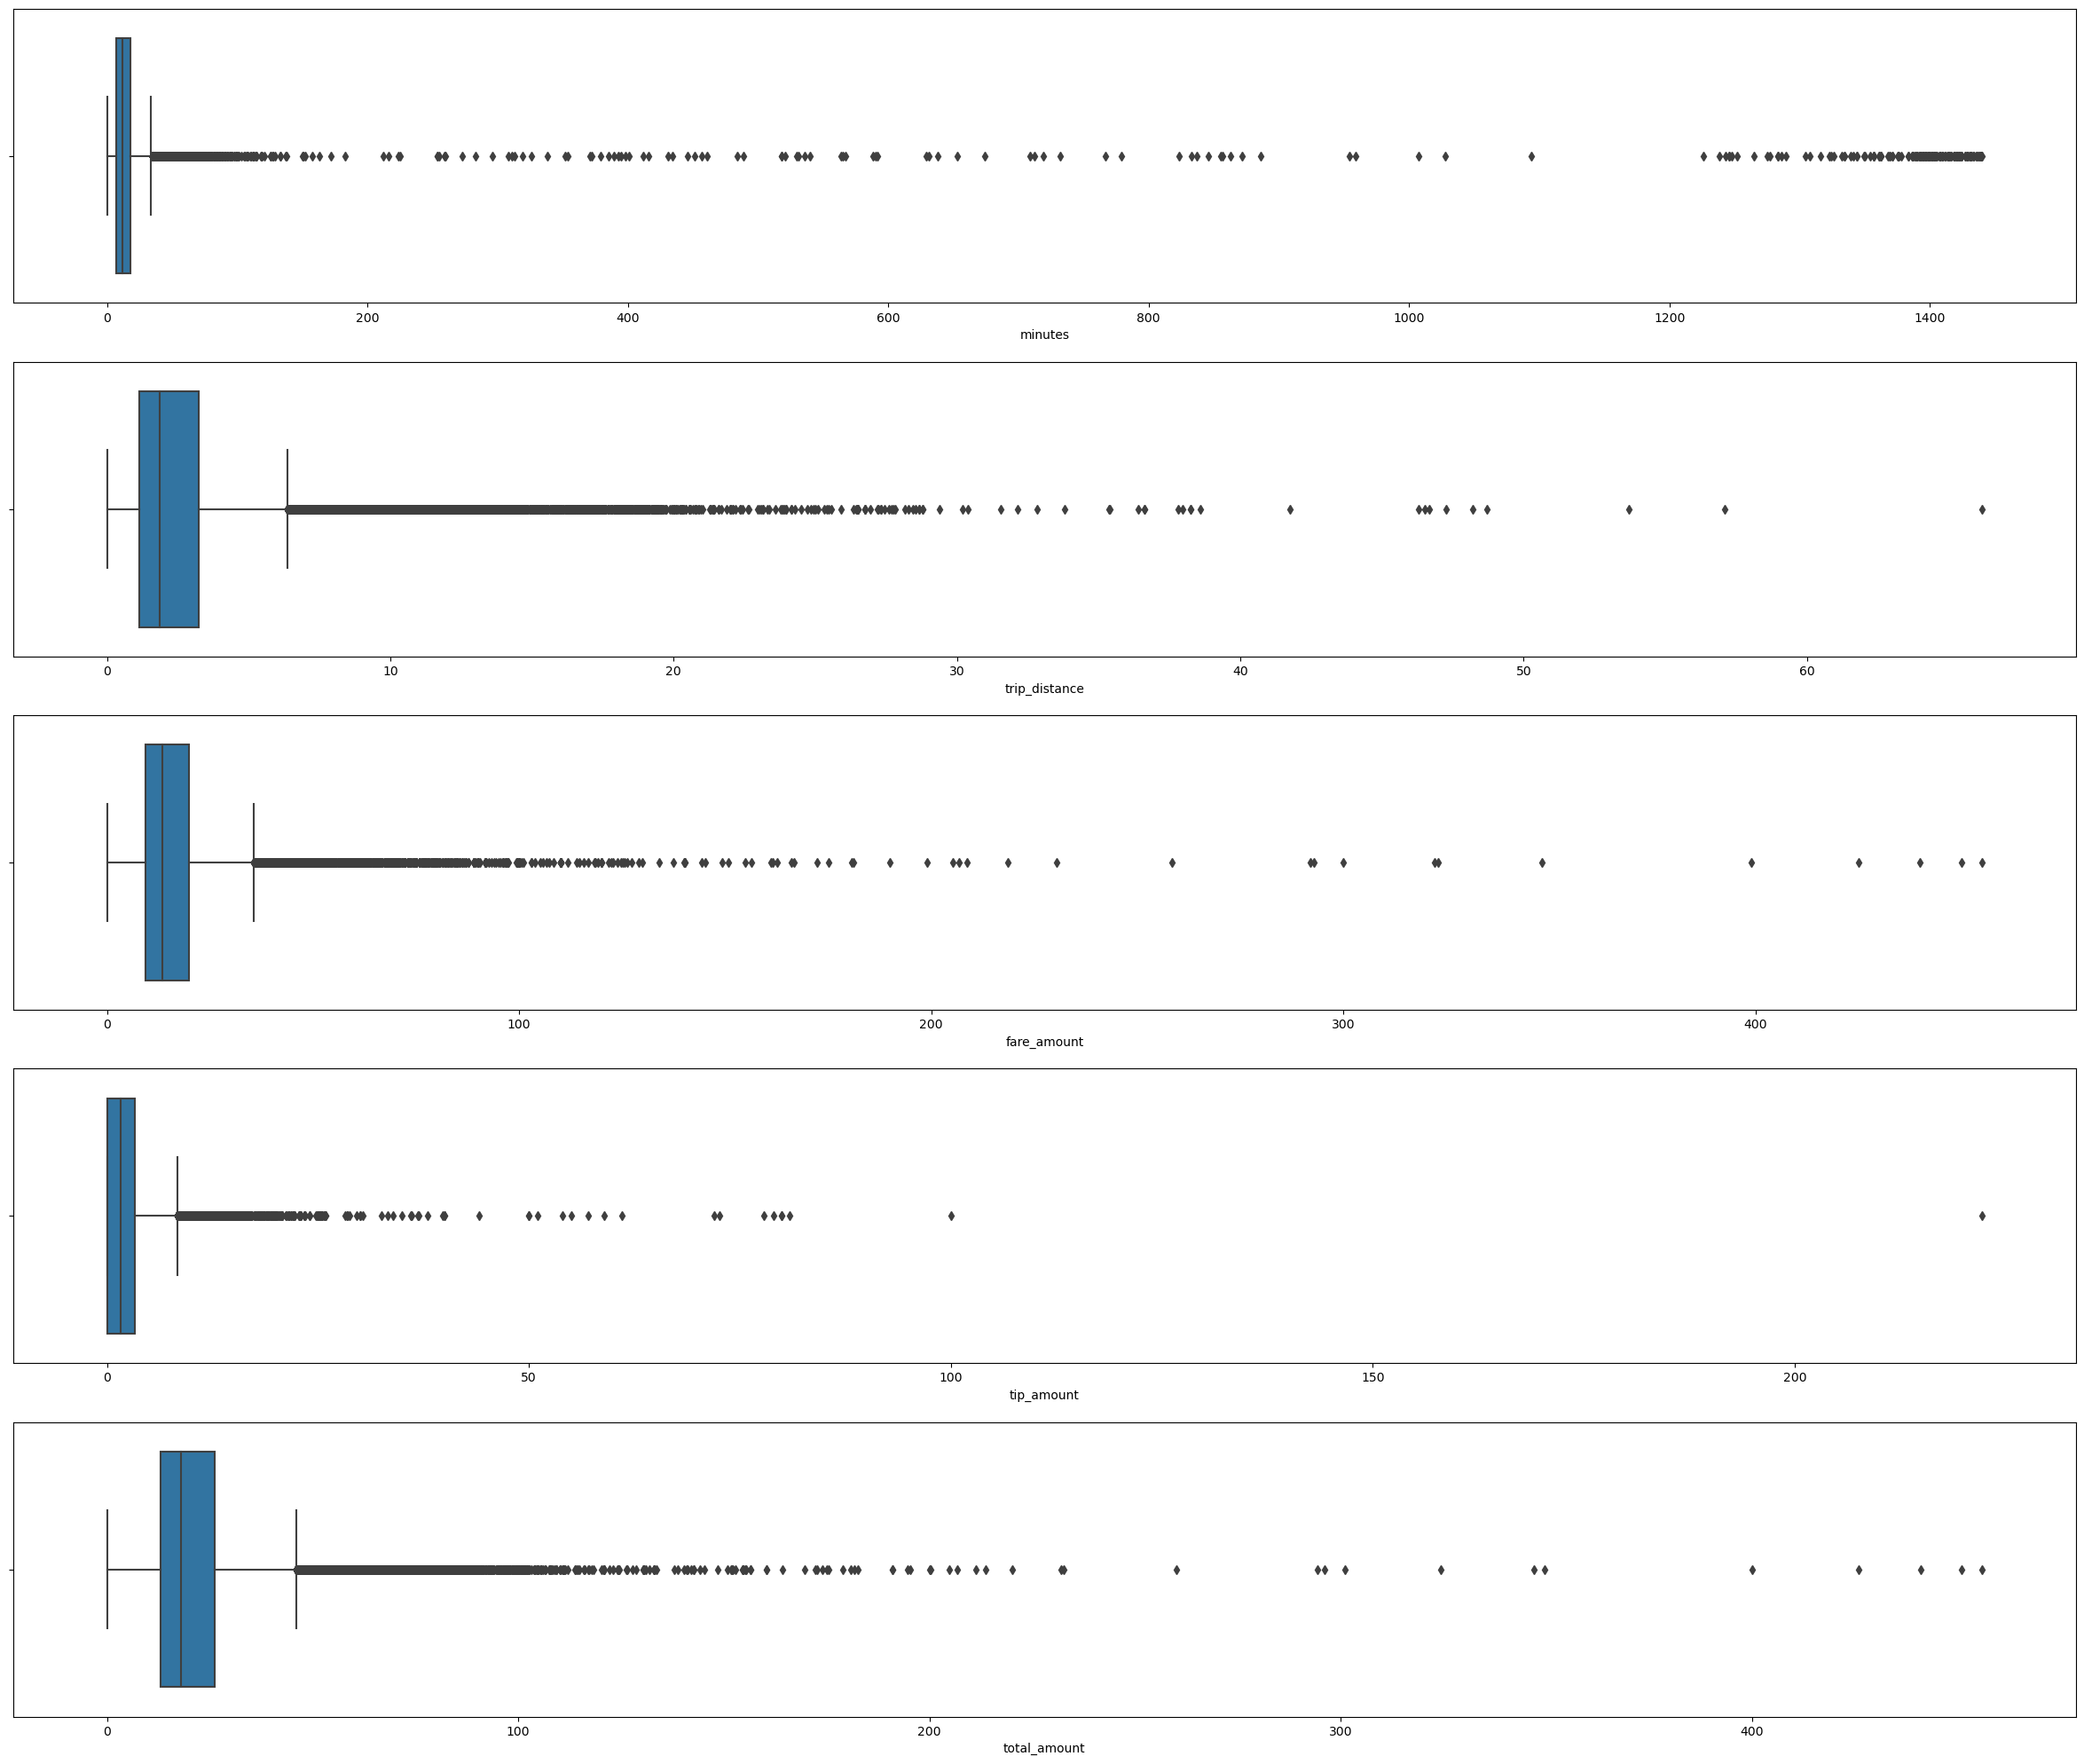

In [381]:
fig, axes = plt.subplots(nrows=5, ncols = 1, figsize = (30,25))
for index, column in enumerate(df.select_dtypes(include='number')):
    sns.boxplot(data=df, x=column, ax=axes[index])

### In spite of the prevalence of outliers post data cleaning, these are valid points when referring to the previous anomaly detection and error correction analysis.

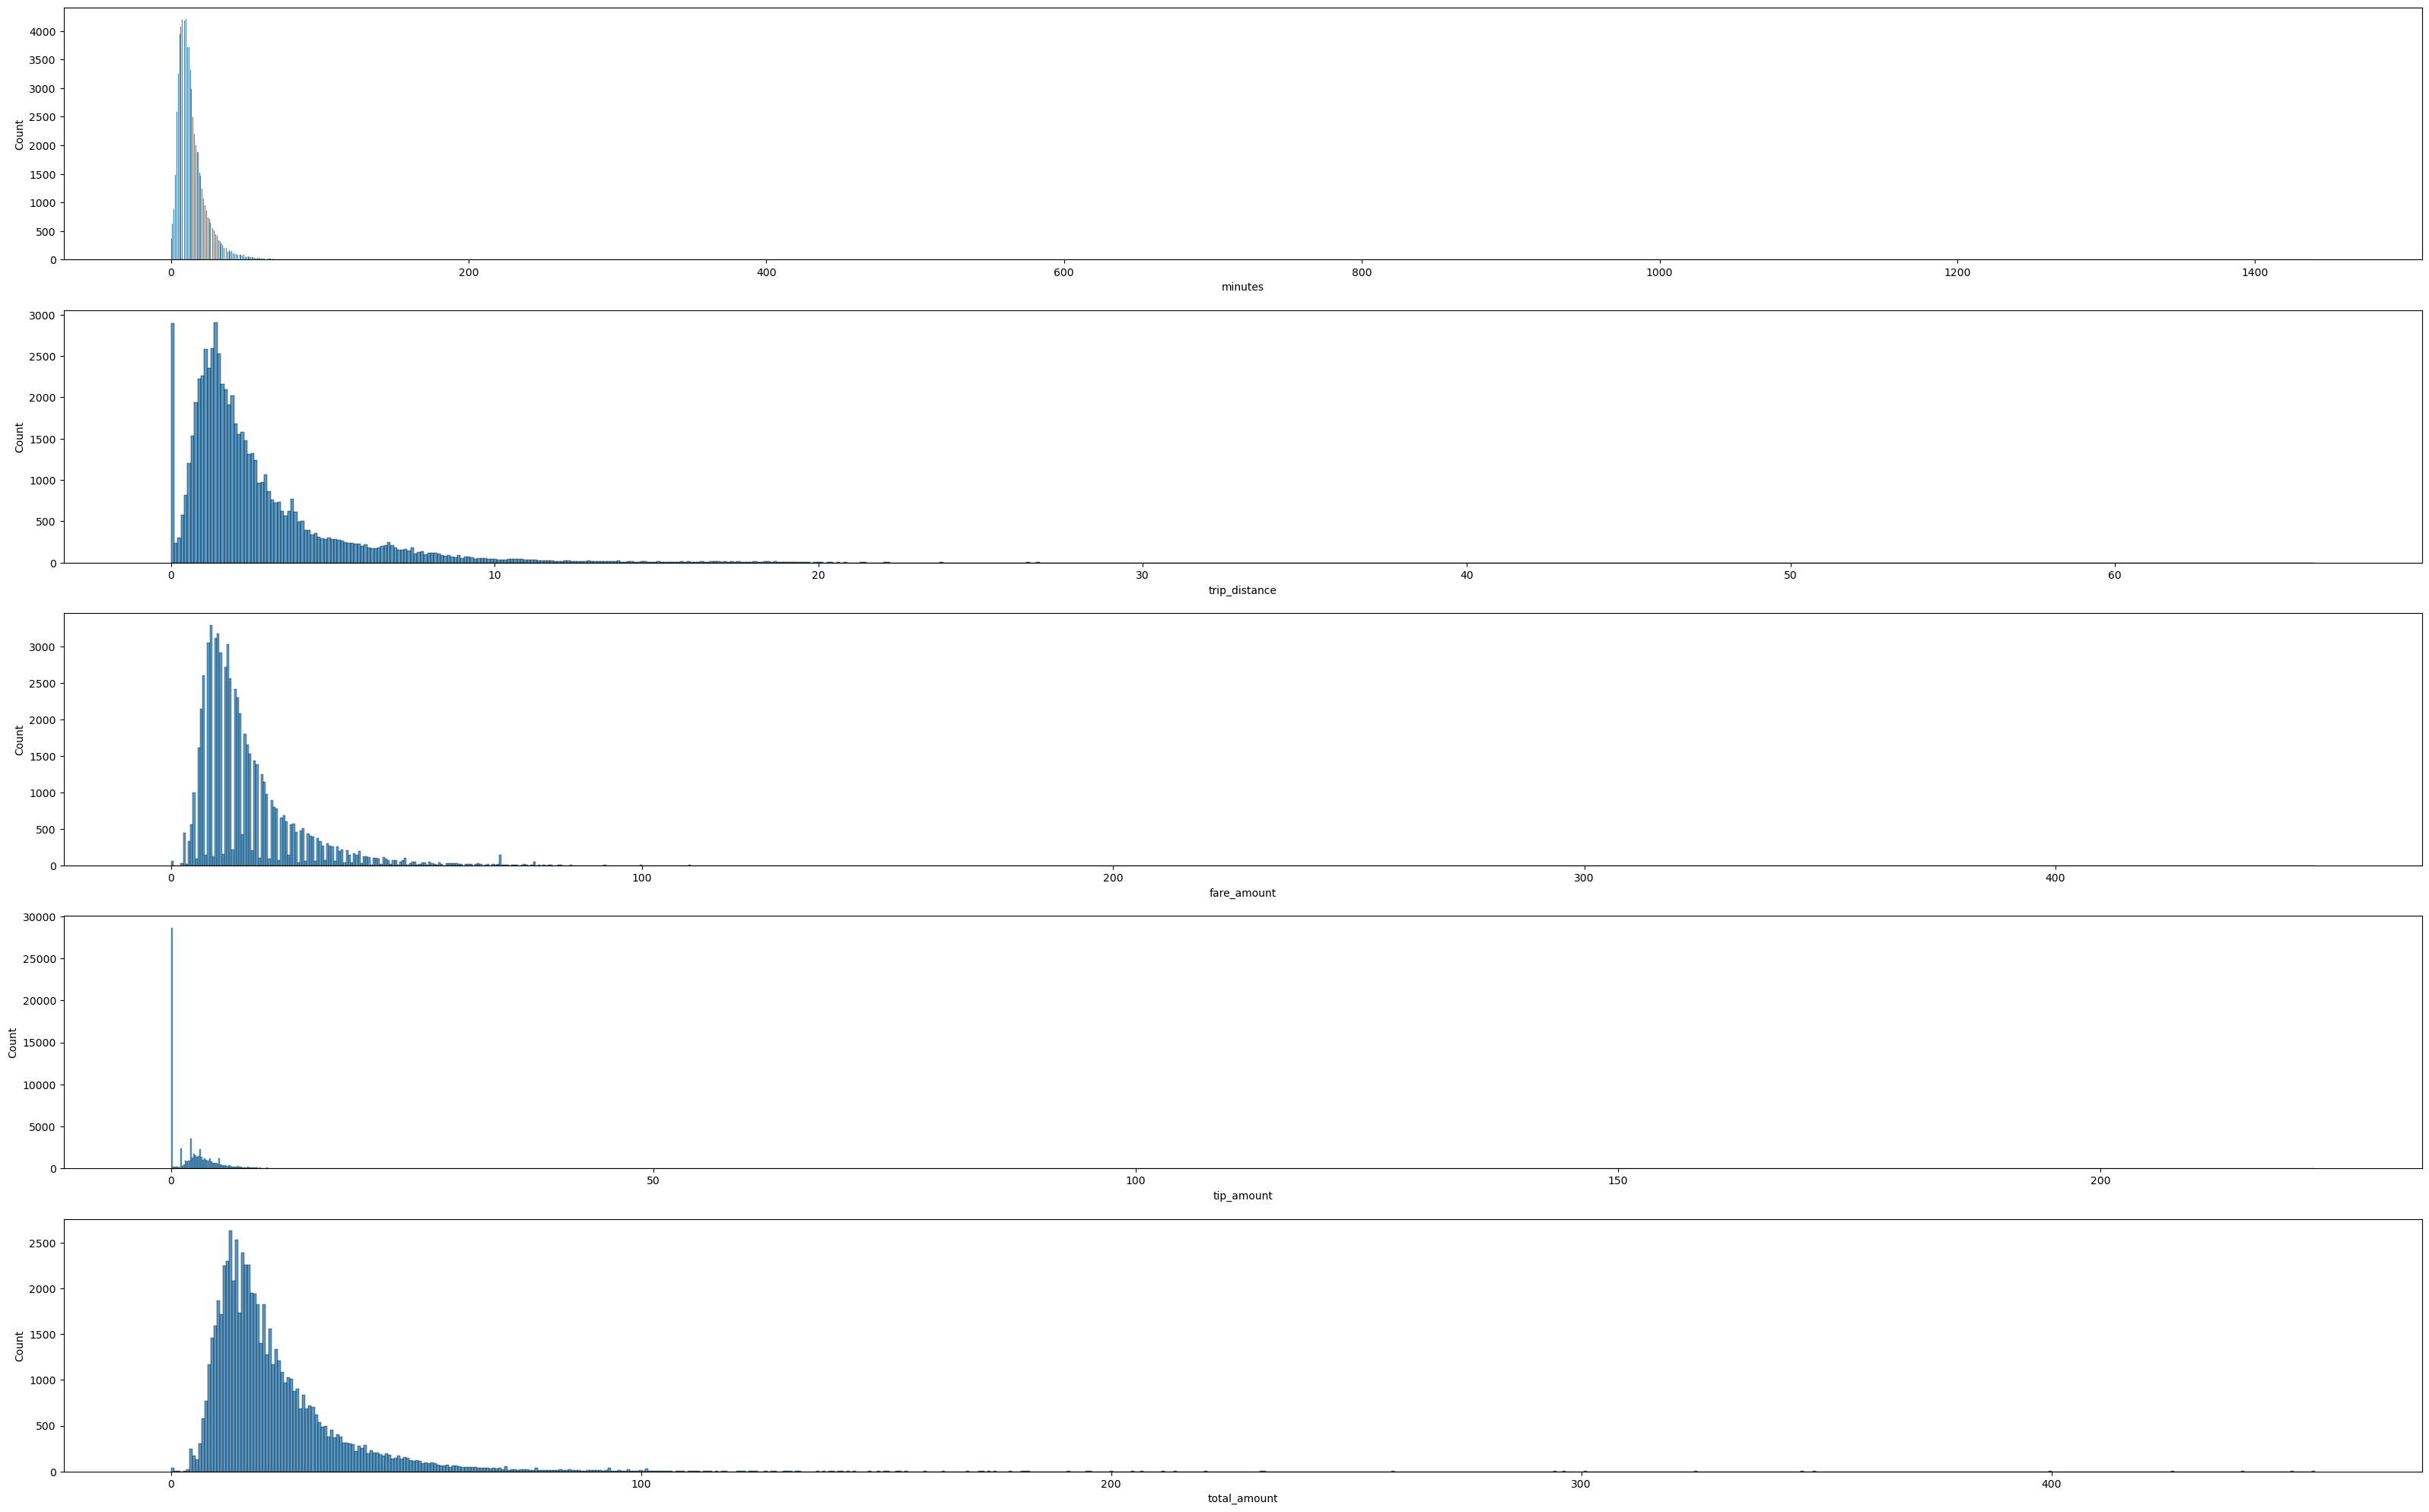

In [382]:
fig, axes = plt.subplots(nrows=5, ncols = 1, figsize = (40,25))
for index, column in enumerate(df.select_dtypes(include='number')):
    sns.histplot(data=df, x=column, ax=axes[index])

### All distributions have visible right skews, with some having close resemblance to the normal distribution. Normality tests are therefore in order.

In [383]:
# conducting tests of normality
from scipy.stats import kstest, shapiro, normaltest
from statsmodels.stats.diagnostic import lilliefors

stat_list = []
pval_list = []

for column in df.select_dtypes(include='number'):
    test_stat, pval = kstest(df[column],"norm")
    stat_list.append(test_stat)
    pval_list.append(pval)

result_df = pd.DataFrame({
    "Test": "KS",
    "Column Name": df.select_dtypes(include='number').columns,
    "Test Statistic": stat_list,
    "P Value": pval_list})

result_df["Normal"] = result_df["P Value"] > 0.05

result_df

,Test,Column Name,Test Statistic,P Value,Normal
0,KS,minutes,0.970658,0.0,False
1,KS,trip_distance,0.657258,0.0,False
2,KS,fare_amount,0.997297,0.0,False
3,KS,tip_amount,0.500000,0.0,False
4,KS,total_amount,0.998978,0.0,False


In [384]:
stat_list = []
pval_list = []

for column in df.select_dtypes(include='number'):
    test_stat, pval = lilliefors(df[column])
    stat_list.append(test_stat)
    pval_list.append(pval)

result_df = pd.DataFrame({
    "Test": "LF",
    "Column Name": df.select_dtypes(include='number').columns,
    "Test Statistic": stat_list,
    "P Value": pval_list})

result_df["Normal"] = result_df["P Value"] > 0.05

result_df

,Test,Column Name,Test Statistic,P Value,Normal
0,LF,minutes,0.403922,0.001,False
1,LF,trip_distance,0.181677,0.001,False
2,LF,fare_amount,0.167307,0.001,False
3,LF,tip_amount,0.238723,0.001,False
4,LF,total_amount,0.145183,0.001,False


In [385]:
stat_list = []
pval_list = []

for column in df.select_dtypes(include='number'):
    test_stat, pval = shapiro(df[column])
    stat_list.append(test_stat)
    pval_list.append(pval)

result_df = pd.DataFrame({
    "Test": "Shapiro",
    "Column Name": df.select_dtypes(include='number').columns,
    "Test Statistic": stat_list,
    "P Value": pval_list})

result_df["Normal"] = result_df["P Value"] > 0.05

result_df

c:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Test,Column Name,Test Statistic,P Value,Normal
0,Shapiro,minutes,0.087063,0.0,False
1,Shapiro,trip_distance,0.694926,0.0,False
2,Shapiro,fare_amount,0.675253,0.0,False
3,Shapiro,tip_amount,0.644100,0.0,False
4,Shapiro,total_amount,0.722570,0.0,False


In [386]:
stat_list = []
pval_list = []

for column in df.select_dtypes(include='number'):
    test_stat, pval = normaltest(df[column])
    stat_list.append(test_stat)
    pval_list.append(pval)

result_df = pd.DataFrame({
    "Test": "DP",
    "Column Name": df.select_dtypes(include='number').columns,
    "Test Statistic": stat_list,
    "P Value": pval_list})

result_df["Normal"] = result_df["P Value"] > 0.05

result_df

,Test,Column Name,Test Statistic,P Value,Normal
0,DP,minutes,136199.755612,0.0,False
1,DP,trip_distance,56108.410920,0.0,False
2,DP,fare_amount,84551.771102,0.0,False
3,DP,tip_amount,111183.221331,0.0,False
4,DP,total_amount,70991.170459,0.0,False


### Based on the four tests, it is appropriate to infer that the population of minutes, trip_distance, fare_amount, tip_amount, and total_amount are not normally distributed. Henceforth, the columns will be analyzed using non-parametric methods.

## Correlation Analysis

In [387]:
correlation = df.corr(method = "spearman")

<AxesSubplot:>

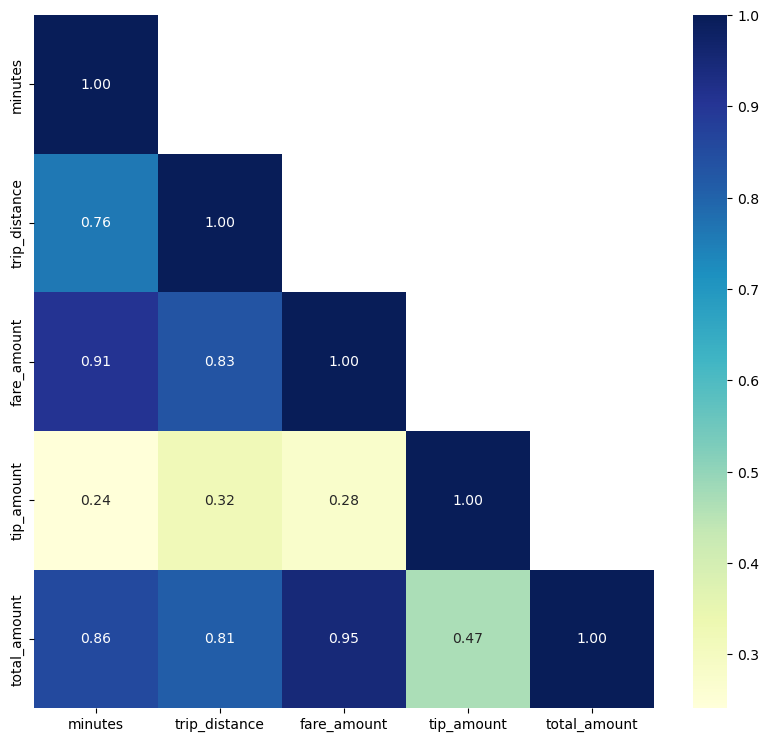

In [388]:
plt.figure(figsize = (10,9))
mask = ~np.tril(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation.select_dtypes(include = "number"), cmap="YlGnBu", annot=True, fmt=".2f", mask = mask)

### We have found three variables have strong statistical correlations with total_amount, the variable of interest.

# F. Final Dataframe Formatting

In [389]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,minutes,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,11,1,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,7,1,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,6,1,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,6,1,41,238,1,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,6,1,41,74,1,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67229,2,2023-01-31 21:56:00,2023-01-31 22:14:00,18,1,75,186,1,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,1,1,0.0
67230,2,2023-01-31 22:40:00,2023-01-31 22:48:00,8,1,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1,1,0.0
67231,2,2023-01-31 23:46:00,2023-02-01 00:02:00,16,1,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1,1,0.0
67232,2,2023-01-31 23:01:00,2023-01-31 23:19:00,18,1,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1,1,0.0


#### The numbers contained in PULocationID and DOLocationID correspond to specific boroughs, zones, and service zones from "taxi_zone_lookup.csv" found in the Taxi Zone Maps and Lookup Tables section of the official NYC TLC Trip Record dataset documentation (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). The reason for why this formatting isn't done earlier in the analysis is that the dataset serves to add optional information for a more easily understandable final dataframe, that is with the direct use of location names in place of numerical IDs that refer to them. This is essentially an optional step for the sake of better output readability, and therefore should be separated from the more critical steps of the analysis. The additional dataframe will be read below.

In [390]:
df_lookup = pd.read_csv("taxi_zone_lookup.csv")
df_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [391]:
df_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [392]:
df_lookup["LocationID"] = df_lookup["LocationID"].astype(str)
df_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    object
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: object(4)
memory usage: 8.4+ KB


In [393]:
df_lookup.isnull().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [394]:
df_lookup.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


#### Using the code above, we were able to detect all of the null values present in the lookup dataframe

In [395]:
df_lookup["Borough"].fillna("Outside of NYC",inplace = True)
df_lookup["Zone"].fillna("Unknown", inplace = True)
df_lookup["service_zone"].fillna("Unknown", inplace=True)

In [396]:
df_lookup.isnull().sum()

LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: int64

In [397]:
df_lookup.describe(include = "object")

,LocationID,Borough,Zone,service_zone
count,265,265,265,265
unique,265,8,262,5
top,1,Queens,Governor's Island/Ellis Island/Liberty Island,Boro Zone
freq,1,69,3,205


Some insights that we can infer from the above:
1. The borough with the most location ID mappings is Queens
2. Every zone has a unique LocationID, with the exception of Governor's Island/Ellis Island/Liberty Island which are three locations mapped onto one index
3. Most LocationIDs map onto Boro Zone in the service zone level

In [398]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,minutes,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,11,1,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,7,1,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,6,1,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,6,1,41,238,1,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,6,1,41,74,1,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67229,2,2023-01-31 21:56:00,2023-01-31 22:14:00,18,1,75,186,1,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,1,1,0.0
67230,2,2023-01-31 22:40:00,2023-01-31 22:48:00,8,1,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1,1,0.0
67231,2,2023-01-31 23:46:00,2023-02-01 00:02:00,16,1,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1,1,0.0
67232,2,2023-01-31 23:01:00,2023-01-31 23:19:00,18,1,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1,1,0.0


In [399]:
melted = pd.melt(df[["PULocationID","DOLocationID"]],var_name = "location", value_name="LocationID")
melted

,location,LocationID
0,PULocationID,166
1,PULocationID,24
2,PULocationID,223
3,PULocationID,41
4,PULocationID,41
...,...,...
134463,DOLocationID,186
134464,DOLocationID,205
134465,DOLocationID,37
134466,DOLocationID,189


In [400]:
merged = pd.merge(left = melted, right= df_lookup, how = "left", on = "LocationID")
merged

,location,LocationID,Borough,Zone,service_zone
0,PULocationID,166,Manhattan,Morningside Heights,Boro Zone
1,PULocationID,24,Manhattan,Bloomingdale,Yellow Zone
2,PULocationID,223,Queens,Steinway,Boro Zone
3,PULocationID,41,Manhattan,Central Harlem,Boro Zone
4,PULocationID,41,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...
134463,DOLocationID,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
134464,DOLocationID,205,Queens,Saint Albans,Boro Zone
134465,DOLocationID,37,Brooklyn,Bushwick South,Boro Zone
134466,DOLocationID,189,Brooklyn,Prospect Heights,Boro Zone


In [401]:
df_concat = pd.concat([merged[:int(len(merged)/2)],merged[int(len(merged)/2):].reset_index(drop=True)], axis = 1)
df_concat

,location,LocationID,Borough,Zone,service_zone,location,LocationID,Borough,Zone,service_zone
0,PULocationID,166,Manhattan,Morningside Heights,Boro Zone,DOLocationID,143,Manhattan,Lincoln Square West,Yellow Zone
1,PULocationID,24,Manhattan,Bloomingdale,Yellow Zone,DOLocationID,43,Manhattan,Central Park,Yellow Zone
2,PULocationID,223,Queens,Steinway,Boro Zone,DOLocationID,179,Queens,Old Astoria,Boro Zone
3,PULocationID,41,Manhattan,Central Harlem,Boro Zone,DOLocationID,238,Manhattan,Upper West Side North,Yellow Zone
4,PULocationID,41,Manhattan,Central Harlem,Boro Zone,DOLocationID,74,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...
67229,PULocationID,75,Manhattan,East Harlem South,Boro Zone,DOLocationID,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
67230,PULocationID,10,Queens,Baisley Park,Boro Zone,DOLocationID,205,Queens,Saint Albans,Boro Zone
67231,PULocationID,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,DOLocationID,37,Brooklyn,Bushwick South,Boro Zone
67232,PULocationID,225,Brooklyn,Stuyvesant Heights,Boro Zone,DOLocationID,189,Brooklyn,Prospect Heights,Boro Zone


#### The columns are renamed below to avoid duplicity

In [402]:
df_concat.columns = ["location1","PULocationID","PUBorough","PUZone","pu_service_zone","location2","DOLocationID","DOBorough","DOZone","do_service_zone"]
df_concat.drop(["location1","location2"], axis = 1, inplace = True)
df_concat

,PULocationID,PUBorough,PUZone,pu_service_zone,DOLocationID,DOBorough,DOZone,do_service_zone
0,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...
67229,75,Manhattan,East Harlem South,Boro Zone,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
67230,10,Queens,Baisley Park,Boro Zone,205,Queens,Saint Albans,Boro Zone
67231,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,37,Brooklyn,Bushwick South,Boro Zone
67232,225,Brooklyn,Stuyvesant Heights,Boro Zone,189,Brooklyn,Prospect Heights,Boro Zone


#### Some dataframe columns will be excluded from the final dataframe according to their relevance to the analysis

In [403]:
display(df, df_concat)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,minutes,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,11,1,166,143,1,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,7,1,24,43,1,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,6,1,223,179,1,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,6,1,41,238,1,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,6,1,41,74,1,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67229,2,2023-01-31 21:56:00,2023-01-31 22:14:00,18,1,75,186,1,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,1,1,0.0
67230,2,2023-01-31 22:40:00,2023-01-31 22:48:00,8,1,10,205,1,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1,1,0.0
67231,2,2023-01-31 23:46:00,2023-02-01 00:02:00,16,1,66,37,1,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1,1,0.0
67232,2,2023-01-31 23:01:00,2023-01-31 23:19:00,18,1,225,189,1,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1,1,0.0


,PULocationID,PUBorough,PUZone,pu_service_zone,DOLocationID,DOBorough,DOZone,do_service_zone
0,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...
67229,75,Manhattan,East Harlem South,Boro Zone,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
67230,10,Queens,Baisley Park,Boro Zone,205,Queens,Saint Albans,Boro Zone
67231,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,37,Brooklyn,Bushwick South,Boro Zone
67232,225,Brooklyn,Stuyvesant Heights,Boro Zone,189,Brooklyn,Prospect Heights,Boro Zone


In [404]:
df_final = pd.concat([df[['lpep_pickup_datetime', 'lpep_dropoff_datetime', "minutes", "passenger_count", "trip_distance","fare_amount","tip_amount","total_amount","payment_type","trip_type","congestion_surcharge"]], df_concat], axis = 1)
df_final

,lpep_pickup_datetime,lpep_dropoff_datetime,minutes,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion_surcharge,PULocationID,PUBorough,PUZone,pu_service_zone,DOLocationID,DOBorough,DOZone,do_service_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,11,1,2.58,14.90,4.03,24.18,1,1,2.75,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,7,1,1.81,10.70,2.64,15.84,1,1,0.0,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,2023-01-01 00:35:12,2023-01-01 00:41:32,6,1,0.00,7.20,1.94,11.64,1,1,0.0,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,2023-01-01 00:13:14,2023-01-01 00:19:03,6,1,1.30,6.50,1.70,10.20,1,1,0.0,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,2023-01-01 00:33:04,2023-01-01 00:39:02,6,1,1.10,6.00,0.00,8.00,1,1,0.0,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67229,2023-01-31 21:56:00,2023-01-31 22:14:00,18,1,3.92,20.72,1.25,25.02,1,1,0.0,75,Manhattan,East Harlem South,Boro Zone,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
67230,2023-01-31 22:40:00,2023-01-31 22:48:00,8,1,2.14,4.41,0.00,5.41,1,1,0.0,10,Queens,Baisley Park,Boro Zone,205,Queens,Saint Albans,Boro Zone
67231,2023-01-31 23:46:00,2023-02-01 00:02:00,16,1,3.44,16.53,3.51,21.04,1,1,0.0,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,37,Brooklyn,Bushwick South,Boro Zone
67232,2023-01-31 23:01:00,2023-01-31 23:19:00,18,1,3.03,14.98,3.20,19.18,1,1,0.0,225,Brooklyn,Stuyvesant Heights,Boro Zone,189,Brooklyn,Prospect Heights,Boro Zone


#### Rows that have an Unknown or Outside of NYC origin/destination may disrupt the analysis of rides within New York City. For this reason, they should be dropped.

In [405]:
len(df_final[(df_final["PUBorough"] == "Unknown")|(df_final["DOBorough"] == "Unknown")][["lpep_pickup_datetime","lpep_dropoff_datetime","trip_distance"]])

188

In [406]:
df_final.drop(df_final[(df_final["PUBorough"] == "Unknown")|(df_final["DOBorough"] == "Unknown")].index, inplace=True)
df_final.reset_index(inplace=True,drop=True)

In [407]:
len(df_final[(df_final["PUBorough"] == "Outside of NYC")|(df_final["DOBorough"] == "Outside of NYC")][["lpep_pickup_datetime","lpep_dropoff_datetime","trip_distance"]])

275

In [408]:
df_final.drop(df_final[(df_final["PUBorough"] == "Outside of NYC")|(df_final["DOBorough"] == "Outside of NYC")].index,inplace=True)
df_final.reset_index(inplace=True,drop=True)

### Final Review

In [409]:
df_final

,lpep_pickup_datetime,lpep_dropoff_datetime,minutes,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion_surcharge,PULocationID,PUBorough,PUZone,pu_service_zone,DOLocationID,DOBorough,DOZone,do_service_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,11,1,2.58,14.90,4.03,24.18,1,1,2.75,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,7,1,1.81,10.70,2.64,15.84,1,1,0.0,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,2023-01-01 00:35:12,2023-01-01 00:41:32,6,1,0.00,7.20,1.94,11.64,1,1,0.0,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,2023-01-01 00:13:14,2023-01-01 00:19:03,6,1,1.30,6.50,1.70,10.20,1,1,0.0,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,2023-01-01 00:33:04,2023-01-01 00:39:02,6,1,1.10,6.00,0.00,8.00,1,1,0.0,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66766,2023-01-31 21:56:00,2023-01-31 22:14:00,18,1,3.92,20.72,1.25,25.02,1,1,0.0,75,Manhattan,East Harlem South,Boro Zone,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
66767,2023-01-31 22:40:00,2023-01-31 22:48:00,8,1,2.14,4.41,0.00,5.41,1,1,0.0,10,Queens,Baisley Park,Boro Zone,205,Queens,Saint Albans,Boro Zone
66768,2023-01-31 23:46:00,2023-02-01 00:02:00,16,1,3.44,16.53,3.51,21.04,1,1,0.0,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,37,Brooklyn,Bushwick South,Boro Zone
66769,2023-01-31 23:01:00,2023-01-31 23:19:00,18,1,3.03,14.98,3.20,19.18,1,1,0.0,225,Brooklyn,Stuyvesant Heights,Boro Zone,189,Brooklyn,Prospect Heights,Boro Zone


In [410]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66771 entries, 0 to 66770
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   66771 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  66771 non-null  datetime64[ns]
 2   minutes                66771 non-null  int32         
 3   passenger_count        66771 non-null  object        
 4   trip_distance          66771 non-null  float64       
 5   fare_amount            66771 non-null  float64       
 6   tip_amount             66771 non-null  float64       
 7   total_amount           66771 non-null  float64       
 8   payment_type           66771 non-null  object        
 9   trip_type              66771 non-null  object        
 10  congestion_surcharge   66771 non-null  object        
 11  PULocationID           66771 non-null  object        
 12  PUBorough              66771 non-null  object        
 13  P

In [411]:
df_final.isnull().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
minutes                  0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
PULocationID             0
PUBorough                0
PUZone                   0
pu_service_zone          0
DOLocationID             0
DOBorough                0
DOZone                   0
do_service_zone          0
dtype: int64

In [412]:
# Final roundup of values dropped in percentage
print((68211-len(df_final))/68211)

0.02111096450719092


In [82]:
df_final.to_csv('Capstone_2.csv', index=False)